# Haleema Sadia


# Task 10: ML Facial recognition to detect mood and suggest songs accordingly

# Lgmvip Data Science Internship july

## Dataset Link : https://www.kaggle.com/datasets/msambare/fer2013 

In [81]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio
import os
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
import math
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

## Load data method

In [20]:
#load data
def extract_data(folder):
    url = "C:\\Users\\92336\\Downloads\\FaceData\\"+folder+"\\"
    data = []
    i = 0
    for filename in os.listdir(url):
        #reading an image and converting it to grey scale
        image = cv2.imread(os.path.join(url, filename), cv2.IMREAD_GRAYSCALE)
        #inverting the pixels of an image
        #check if the image is a valid image or not
        if image is not None:
            #rehshape the image vector
            #assign a label to an image
            data.append(image)
            data[i] = np.append(data[i])
            i+=1
    return data

## Data extraction

In [146]:
#loading data with labels
data_angry = extract_data("train\\angry",0)
data_disgust = extract_data("train\\disgust",1)
data_happy = extract_data("train\\happy",2)
data_sad = extract_data("train\\sad",3)
data_fear = extract_data("train\\fear",4)
data_neutral = extract_data("train\\neutral",5)
data_surprise = extract_data("train\\surprise",6)

In [147]:
data = np.concatenate((data_angry,data_sad,data_fear))
data = np.concatenate((data,data_happy,data_disgust))
data = np.concatenate((data,data_neutral,data_surprise))

In [148]:
#converting into a dataframe
df_train =pd.DataFrame(data,index=None)


In [149]:
df_train.rename(columns = {2304:'label'}, inplace = True)


In [150]:
df_train['label'] = df_train['label'].astype('category')
df_train["label_new"] = df_train['label'].cat.codes
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    df_train[['label_new']]).toarray())
  
y_train = enc_data
y_train.to_csv('train_target.csv',index=False)

In [151]:
df_train = df_train.drop(['label','label_new'],axis =1)

In [152]:
#saving data into a csv file
df_train.to_csv('train_data.csv',index=False)

In [153]:
#loading data with labels
data_angry = extract_data("test\\angry",0)
data_disgust = extract_data("test\\disgust",1)
data_happy = extract_data("test\\happy",2)
data_sad = extract_data("test\\sad",3)
data_fear = extract_data("test\\fear",4)
data_neutral = extract_data("test\\neutral",5)
data_surprise = extract_data("test\\surprise",6)

In [154]:
data_t = np.concatenate((data_angry,data_sad,data_fear))
data_t = np.concatenate((data_t,data_happy,data_disgust))
data_t = np.concatenate((data_t,data_neutral,data_surprise))

## Data Preprocessing

In [155]:
df_test =pd.DataFrame(data_t,index=None)
df_test.rename(columns = {2304:'label'}, inplace = True)

In [156]:
df_test['label'] = df_test['label'].astype('category')
df_test["label_new"] = df_test['label'].cat.codes
encc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    df_test[['label_new']]).toarray())

In [157]:
y_test = enc_data
y_test.to_csv("test_target.csv",index = False)
df_test = df_test.drop(['label',
                        'label_new'],axis = 1)
df_test.to_csv("test_data.csv",index = False)

In [37]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")
y_train = pd.read_csv("train_target.csv")
y_test = pd.read_csv("test_target.csv")

In [88]:
x_train = np.array(df_train)
y_train = np.array(y_train)
x_test = np.array(df_test)
y_test = np.array(y_test)
print(y_test.shape)
print(x_train.shape)

(7178, 7)
(28709, 2304)


In [89]:
# Convert arrays with image data (train_x and test_x)
# Return the original image size from one-dimensional arrays obtained as a result of previous transformations for writing to.csv

x_train = x_train.reshape(x_train.shape[0], int(math.sqrt(x_train.shape[1])), int(math.sqrt(x_train.shape[1])))
x_test = x_test.reshape(x_test.shape[0], int(math.sqrt(x_test.shape[1])), int(math.sqrt(x_test.shape[1])))

# Convert data type to float

x_train = x_train.astype(float)
x_test = x_test.astype(float)

# Add one more dimension to the x array, since the images are one-color, its size is 1

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Perform image normalization

x_train = x_train / 255
x_test =x_test / 255

print(f'train_x size: {x_train.shape}\ntest_x size: {x_test.shape}')

train_x size: (28709, 48, 48, 1)
test_x size: (7178, 48, 48, 1)


## Building The model

In [112]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu',input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu',input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu',input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

In [114]:
model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

## Trainig the model

In [115]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    verbose = 1,
                    batch_size = 128)

Epoch 1/10
225/225 [==============================] - 155s 682ms/step - loss: 1.7524 - accuracy: 0.3159
Epoch 2/10
225/225 [==============================] - 179s 797ms/step - loss: 1.4979 - accuracy: 0.4145
Epoch 3/10
225/225 [==============================] - 176s 783ms/step - loss: 1.3711 - accuracy: 0.4687
Epoch 4/10
225/225 [==============================] - 169s 752ms/step - loss: 1.2902 - accuracy: 0.5030
Epoch 5/10
225/225 [==============================] - 175s 779ms/step - loss: 1.2234 - accuracy: 0.5307
Epoch 6/10
225/225 [==============================] - 168s 747ms/step - loss: 1.1692 - accuracy: 0.5557
Epoch 7/10
225/225 [==============================] - 175s 778ms/step - loss: 1.1034 - accuracy: 0.5809
Epoch 8/10
225/225 [==============================] - 172s 763ms/step - loss: 1.0391 - accuracy: 0.6056
Epoch 9/10
225/225 [==============================] - 173s 770ms/step - loss: 0.9764 - accuracy: 0.6344
Epoch 10/10
225/225 [==============================] - 156s 695m

In [116]:
model.save("model1.h5")

## Prediction

x size: (1, 48, 48, 1, 1), x type: float32


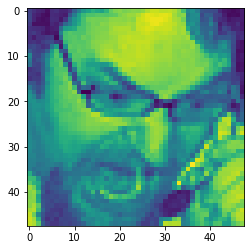

In [133]:
x = x_test[0]
plt.imshow(x)
x = x.astype('float32')
# Add two dimensions to the x array. Since array contain only one image and the image are one-color, size of dimensions is 1
x = np.expand_dims(x, axis=2)
x = np.expand_dims(x, axis=0)
# Perform image normalization
x = x / 255

print(f'x size: {x.shape}, x type: {x.dtype}')

In [143]:
prediction = model.predict(x)
pred = enc.inverse_transform(prediction)
print(pred[0][0])
list = ['angry','disgust','happy','sad','fear','neutral','surprise']
count = 0
for i in prediction[0]:
    print(list[count],": ",i)
    count+=1
    

0
angry :  0.52824944
disgust :  0.00076344184
happy :  0.15277629
sad :  0.09286326
fear :  0.011941005
neutral :  0.19566342
surprise :  0.01774313


## The model predicted Angry

In [139]:
pred = pred[0][0]

## Song Suggestion

In [144]:
link = 'http://inmood.ru/mood/'
print(f'This person looks {pred}!\nI think it is what he needs now! Listen to one of these tracks:')

if pred == 0: # angry
    print(f'{link}angry/ , for example "Violence — Dope"')
elif prediction == 1: # disgust
    print(f'{link}rebel/ , for example "Metallica — Die Die My Darling"')
elif prediction == 2: # fear
    print(f'{link}happy/ , for example "Safe And Sound — Capital Cities"')
elif prediction == 3: # happy
    print(f'{link}sad/ , for example "Black Black Heart — David Usher"')
elif prediction == 4: # neutral
    print(f'{link}worried/ , for example "Lux Aeterna — Clint Mansell Feat. Krono"')
elif prediction == 5: # sad
    print(f'{link}calm/ , for example "Im Not The Only One — Sam Smith"')
else: # surprise
    print(f'{link}positive/ , for example "I Got You (I Feel Good) — James Brown"')



This person looks [[0]]!
I think it is what he needs now! Listen to one of these tracks:
http://inmood.ru/mood/angry/ , for example "Violence — Dope"
